In [2]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from scipy.stats import norm

# BORDEAUX

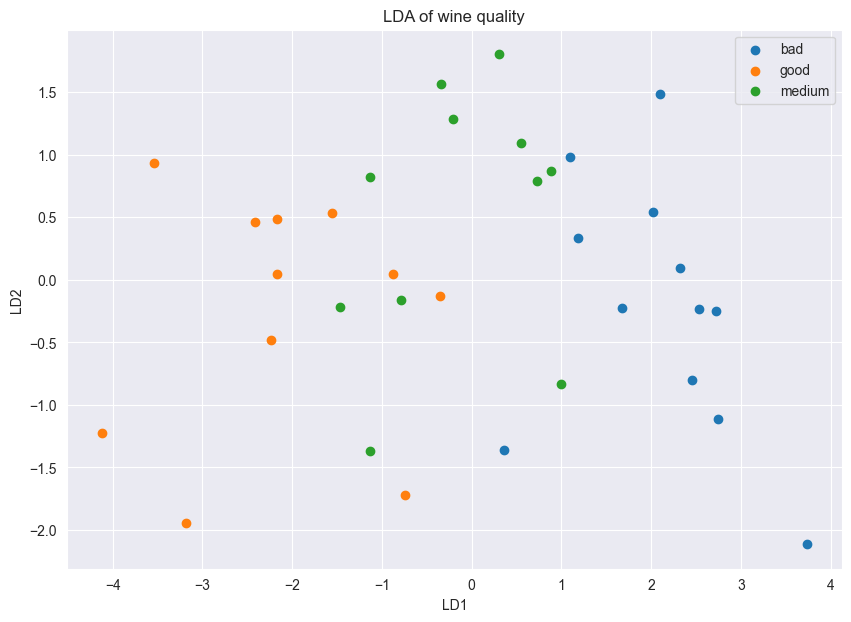

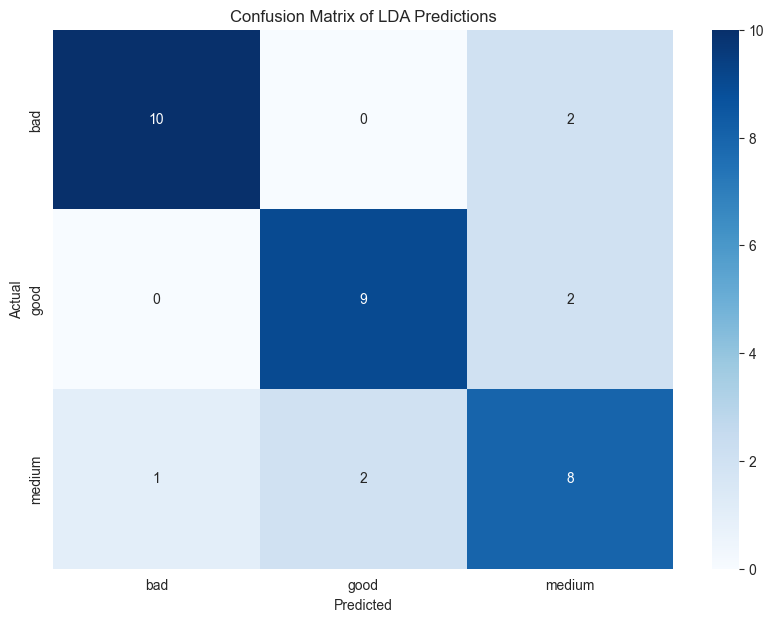

Accuracy: 79.41%
Dimensions: 2


In [6]:
bordeaux_df = pd.read_csv('../datasets/bordeaux.csv', delimiter=';')
bordeaux_df.head()

# Onafhankelijke variabelen
X = bordeaux_df[['temperature', 'sun', 'heat', 'rain']]
# Afhankelijke variabele
y = bordeaux_df['quality']

# Initialize and fit the model
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)  # Trains the model

# Transform the features
X_lda = lda.transform(X)

# Number of dimensions
num_dimensions = X_lda.shape[1]

# Plot the results of the discriminant analysis
plt.figure(figsize=(10, 7))
for label in np.unique(y):
    plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1], label = label)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA of wine quality')
plt.legend()
plt.show()

# Apply the predict command on the original data
y_pred = lda.predict(X)

# Create the confusion matrix
conf_matrix = confusion_matrix(y, y_pred, labels=lda.classes_)

# Plot the confusion matrix using matplotlib and seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lda.classes_, yticklabels=lda.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of LDA Predictions')
plt.show()

# Calculate the accuracy
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Dimensions: {num_dimensions}')

# BIRTHWT

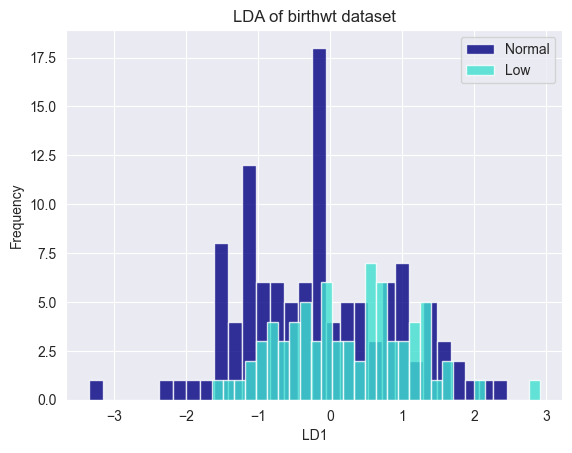

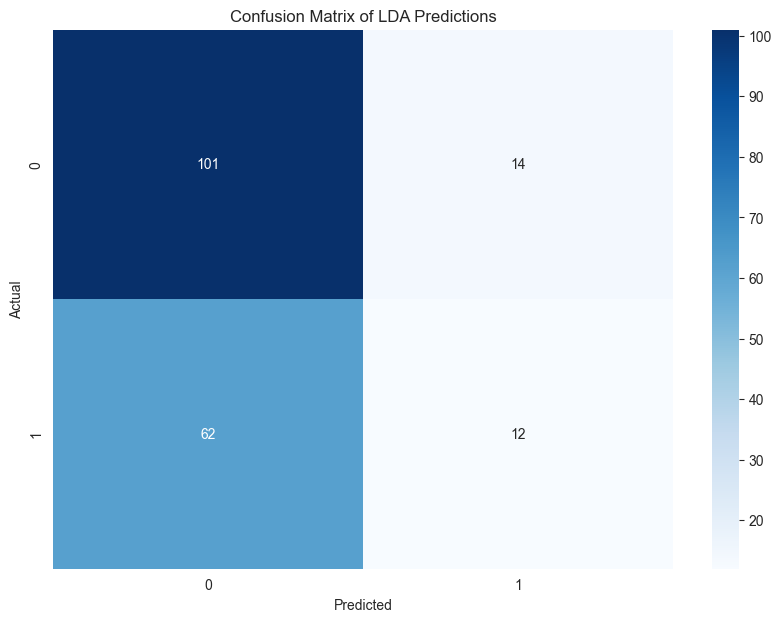

Accuracy: 59.79%
Dimensions: 1


In [7]:
# Load the dataset
birthwt_df = pd.read_csv('../datasets/birthwt.csv', delimiter=';')

# Declare variables
X = birthwt_df[['age', 'lwt', 'bwt']]
y = birthwt_df['smoke']

# Initialize and train the model
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Transform the features
X_lda = lda.transform(X)
num_dimensions = X_lda.shape[1]

# Plot the results
plt.figure()
colors = ['navy', 'turquoise']

for i, color, target_name in zip([0, 1], colors, ['Normal', 'Low']):
    plt.hist(X_lda[y == i], alpha=0.8, color=color, label=target_name, bins=30)

plt.legend(loc='best', shadow=False)
plt.title('LDA of birthwt dataset')
plt.xlabel('LD1')
plt.ylabel('Frequency')
plt.show()

# Predict on the same dataset (since no train-test split was provided)
y_pred = lda.predict(X)

# Create the confusion matrix
conf_matrix = confusion_matrix(y, y_pred, labels=lda.classes_)

# Plot the confusion matrix using matplotlib and seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lda.classes_, yticklabels=lda.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of LDA Predictions')
plt.show()

# Calculate the accuracy
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Dimensions: {num_dimensions}')

# CARS93

((90, 18), (90,)) ((3, 18), (3,))


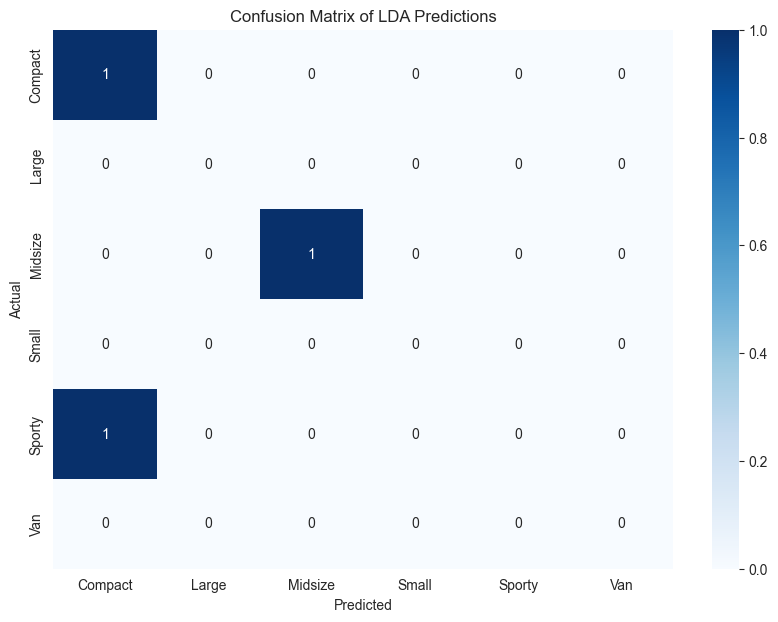

Accuracy: 66.67%
Dimensions: 1


In [8]:
cars_df = pd.read_csv('../datasets/Cars93.csv', delimiter=';')

# Data splitten in train & test data
train_data = cars_df.iloc[:90]
test_data = cars_df.iloc[-3:]

# Separate the features and target variable for training
X_train = train_data[
    ['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
     'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room',
     'Luggage.room', 'Weight']]
y_train = train_data['Type']

# Separate the features and target variable for testing
X_test = test_data[
    ['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
     'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room',
     'Luggage.room', 'Weight']]
y_test = test_data['Type']

# SHIT: Er ontbreken values (NaNs) in onze dataset. Dit accepteert LDA niet. Laten we dit fixen:

# Check for missing values
missing_values = X_train.isnull().sum()
# print(missing_values)

# Fill missing values with the median of the column
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Re-verify the shapes to ensure there are no missing values
print((X_train.shape, y_train.shape), (X_test.shape, y_test.shape))

# LDA Toepassen
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) # Trainen

# Predict on the test set
y_pred = lda.predict(X_test)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=lda.classes_)

# Plot the confusion matrix using matplotlib and seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lda.classes_, yticklabels=lda.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of LDA Predictions')
plt.show()

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Dimensions: {num_dimensions}')